Make an example of using the maps feature of MAF

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import lsst.sims.maf.maps as maps

In [2]:
database = 'enigma_1189_sqlite.db'
opsdb = db.OpsimDatabase(database)
outDir = 'MapExample'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
dustMap = maps.DustMap()

In [11]:
nside = 32
sql = 'night < 300 and filter="r"'
metric = metrics.Coaddm5Metric()
slicer = slicers.HealpixSlicer(nside=nside,)
bundle = metricBundles.MetricBundle(metric,slicer,sql)


Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


Querying database with constraint night < 300 and filter="r"
Found 29289 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with night < 300 and filter="r" sqlconstraint now.
monopole: 25.1234  dipole: lon: -34.99, lat: -52.4684, amp: 0.840294
Plotting complete.


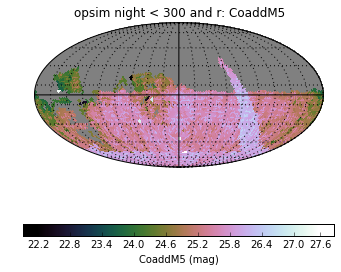

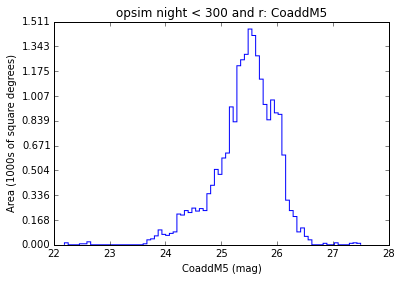

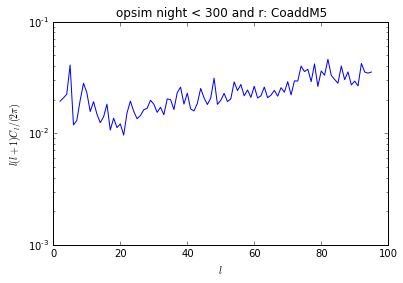

In [12]:
bg = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

Querying database with constraint night < 300 and filter="r"
Found 29289 visits
Running:  [0]
Completed metric generation.

Slicer value of nside (32) different from map value (128), using slicer value
Optimal bin calculation tried to make 1027 bins, returning 200



Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with night < 300 and filter="r" sqlconstraint now.
monopole: 24.5036  dipole: lon: -103.267, lat: -22.7185, amp: 0.603605
Plotting complete.


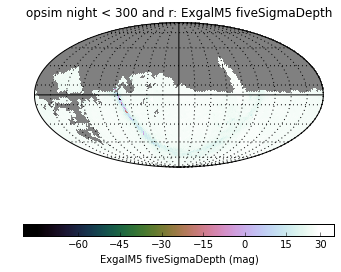

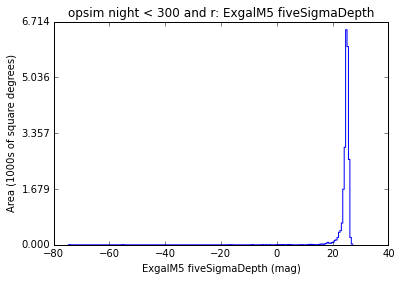

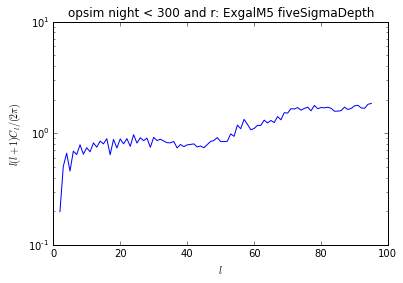

In [13]:
metric=metrics.ExgalM5()
bundle2 = metricBundles.MetricBundle(metric,slicer,sql,mapsList=[dustMap])
bg = metricBundles.MetricBundleGroup({0:bundle2}, opsdb, outDir=outDir, resultsDb=resultsDb )
bg.runAll()
bg.plotAll(closefigs=False)

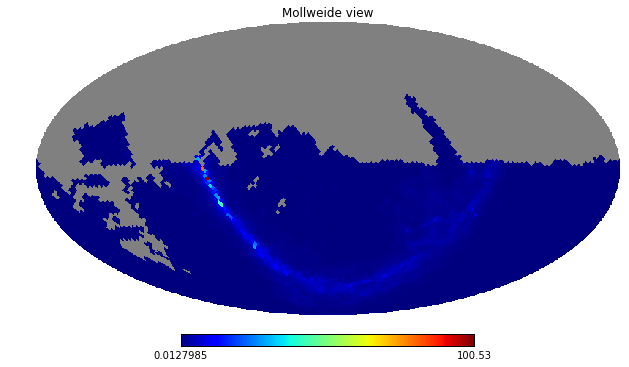

In [14]:
import healpy as hp
hp.mollview(bundle.metricValues - bundle2.metricValues)

Well fuck. Looks like the coordinate conversion I did way back when to make the dust map was bad, and so the extinction is really wrong.  Once we remake the dust map, then this metric should work better.